Homework 5 

In [1]:
# Packages that will be needed 

import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import skimage as ski

import skimage.io
import skimage.transform

import scipy.fftpack as spfft # for discrete cosine transform 

<ipython-input-2-c4e9017ae34f>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img_og = ski.color.rgb2gray(img_og)


Original size:  (292, 228)
Rescaled size:  (53, 41)


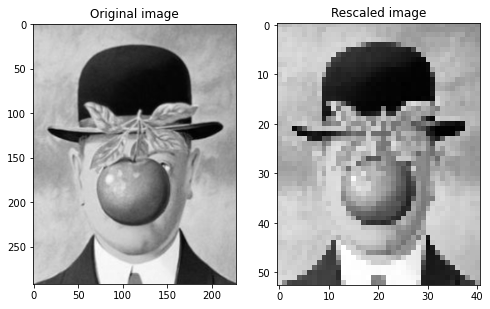

In [2]:
# import image and rescale 
#"C:\Users\user\Desktop\AMATH 582\HW 5\SonOfMan.png"
img_path = 'SonOfMan.png'

# read image
img_og = ski.io.imread(img_path)

# convert to grayscale and visualize 
img_og = ski.color.rgb2gray(img_og)

fig, ax = plt.subplots(1, 2, figsize=(8,10))
ax[0].imshow(img_og, cmap = 'gray')
ax[0].set_title("Original image")

print("Original size: ", img_og.shape)

# resize image 
img = ski.transform.rescale( img_og, 0.18, anti_aliasing=False)

print("Rescaled size: ", img.shape)

ax[1].imshow(img, cmap='gray')
ax[1].set_title("Rescaled image")
plt.show()

In [3]:
# constrauct forward and inverse DCT matrices 

# construct DCT matrix
def construct_DCT_Mat( Nx, Ny ):

  # input : Nx number of columns of image 
  #         Ny number of rows of image 

  # output: D DCT matrix mapping image.flatten() to 
  #         DCT(image).flatten()

  Dx = spfft.dct(np.eye(Nx), axis =0, norm='ortho')

  Dy = spfft.dct(np.eye(Ny), axis = 0, norm='ortho')

  D = np.kron(Dy, Dx)

  return D

# construct inverse DCT matrix
def construct_iDCT_Mat( Nx, Ny ):

  # input : Nx number of columns of image 
  #         Ny number of rows of image 

  # output: iD iDCT matrix mapping DCT(image).flatten() to 
  #         image.flatten()

  Dx = spfft.idct(np.eye(Nx), axis =0, norm='ortho')

  Dy = spfft.idct(np.eye(Ny), axis = 0, norm = 'ortho')

  D = np.kron(Dy, Dx)

  return D

Looking at the resized image DCT coeff bigger than the working image

In [4]:
img1 = ski.transform.rescale( img_og, 0.35, anti_aliasing=False)
row1 = img1.shape[0]
print(row1)
column1 = img1.shape[1]
flatten_size1 = row1*column1
print(flatten_size1)

#img_array = np.array(img)
img1_vec = img1.flatten()
#print(img_vec.shape)

#print(np.in1d(img_vec[0:40],img[0,:]))

DCT_mat1 = construct_DCT_Mat(column1 ,row1  )
print(DCT_mat1.shape)

DCT_img1 = np.matmul(DCT_mat1, img1_vec)
print(DCT_img1.shape)


102
8160
(8160, 8160)
(8160,)


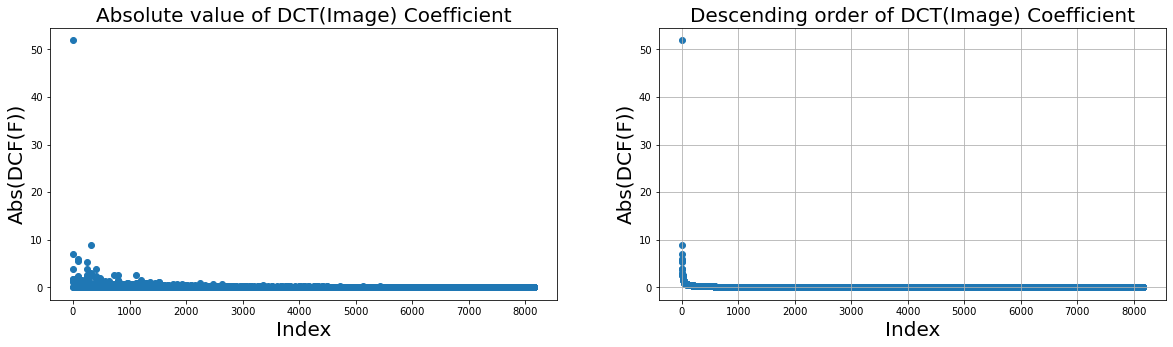

In [5]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].scatter(np.arange(len(DCT_img1)),np.abs(DCT_img1))
ax[0].set_title('Absolute value of DCT(Image) Coefficient',fontsize=20)
ax[0].set_ylabel('Abs(DCF(F))',fontsize=20)
ax[0].set_xlabel('Index',fontsize=20)

ax[1].scatter(np.arange(len(DCT_img1)),np.abs(np.sort(-np.abs(DCT_img1))))
ax[1].set_title('Descending order of DCT(Image) Coefficient',fontsize=20)
ax[1].set_ylabel('Abs(DCF(F))',fontsize=20)
ax[1].set_xlabel('Index',fontsize=20)
ax[1].grid()
plt.show()

Using the rescaled image to do Part 1 of the problem

Rescaled size:  (53, 41)
[0.78545246 0.74867044 0.77828749 0.76432288 0.75967803 0.74044962
 0.76236204 0.74842974 0.70036661 0.69189124 0.76399482 0.75579165
 0.75765137 0.7537298  0.73752378 0.7433372  0.73123018 0.75220282
 0.7139113  0.71383831 0.67514147 0.6891355  0.64133779 0.66038841
 0.6588769  0.61182304 0.59085718 0.60555196 0.57606511 0.56398829
 0.54839528 0.56492491 0.56366116 0.56476863 0.56937598 0.5660283
 0.57289452 0.57286068 0.55862672 0.53502861 0.56067417]


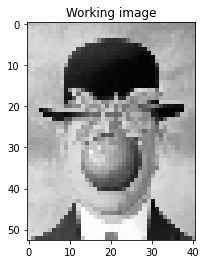

In [6]:
img = ski.transform.rescale( img_og, 0.18, anti_aliasing=False)

print("Rescaled size: ", img.shape)
print(img[1,:])
plt.imshow(img, cmap='gray')
plt.title("Working image")
plt.show()

In [7]:
row = img.shape[0]
print(row)
column = img.shape[1]
flatten_size = row*column
print(flatten_size)

#img_array = np.array(img)
img_vec = img.flatten()
print(img_vec.shape)

print(np.in1d(img_vec[0:40],img[0,:]))

DCT_mat = construct_DCT_Mat(column ,row  )
print(DCT_mat.shape)

DCT_img = np.matmul(DCT_mat, img_vec)
print(DCT_img.shape)


53
2173
(2173,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
(2173, 2173)
(2173,)


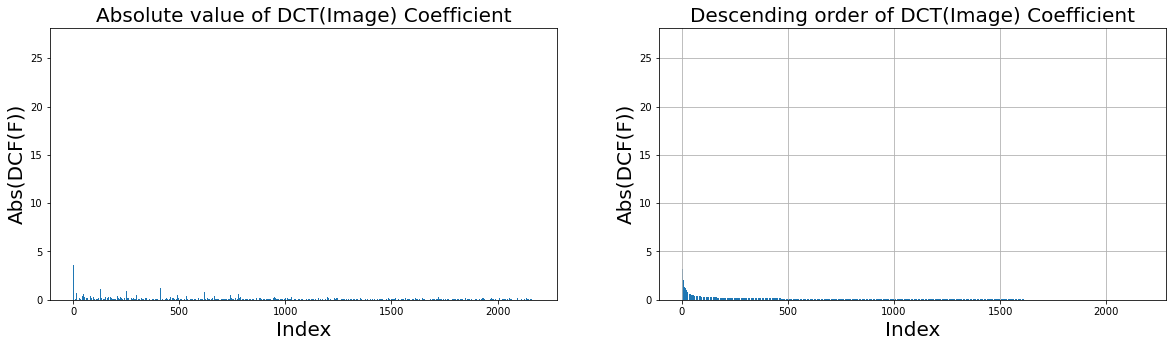

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].bar(np.arange(len(DCT_img)),np.abs(DCT_img))
ax[0].set_title('Absolute value of DCT(Image) Coefficient',fontsize=20)
ax[0].set_ylabel('Abs(DCF(F))',fontsize=20)
ax[0].set_xlabel('Index',fontsize=20)

ax[1].bar(np.arange(len(DCT_img)),np.abs(np.sort(-np.abs(DCT_img))))
ax[1].set_title('Descending order of DCT(Image) Coefficient',fontsize=20)
ax[1].set_ylabel('Abs(DCF(F))',fontsize=20)
ax[1].set_xlabel('Index',fontsize=20)
ax[1].grid()
plt.show()

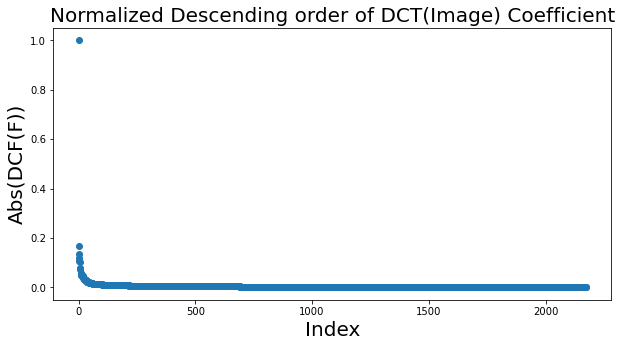

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.scatter(np.arange(len(DCT_img)), np.abs(np.sort(-np.abs(DCT_img))) /np.abs(DCT_img).max() )
ax.set_title('Normalized Descending order of DCT(Image) Coefficient',fontsize=20)
ax.set_ylabel('Abs(DCF(F))',fontsize=20)
ax.set_xlabel('Index',fontsize=20)
plt.show()

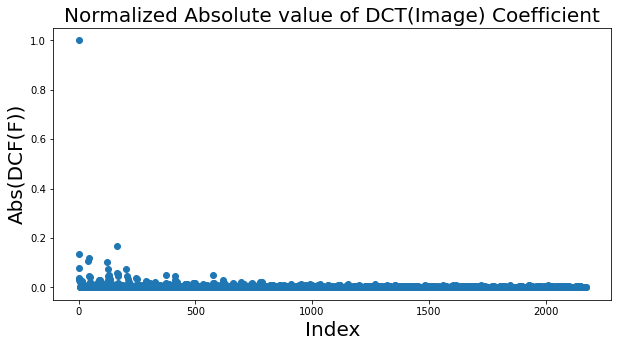

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.scatter(np.arange(len(DCT_img)),np.abs(DCT_img)/np.abs(DCT_img).max())
ax.set_title('Normalized Absolute value of DCT(Image) Coefficient',fontsize=20)
ax.set_ylabel('Abs(DCF(F))',fontsize=20)
ax.set_xlabel('Index',fontsize=20)
plt.show()

Image Compression code is reference from Steve Brunton "Image Compression and the FFT (Examples in Python)" Youtube video 

In [11]:
DCT_img_sort = np.abs(np.sort(-np.abs(DCT_img))) # descending order 

In [12]:
print(int(np.floor((0.05)*len(DCT_img_sort))))

108


In [13]:
threshold_val = DCT_img_sort[int(np.floor((0.05)*len(DCT_img_sort)))] # 0.05 is the percentage of largest coef to keep

In [14]:
print(threshold_val)

0.2981467659172392


In [15]:
indices_vec = np.abs(DCT_img)>threshold_val  
# vectors of 1's and 0's where 1's will be the coeff to keep and 0's will be the coeff that will be killed off 

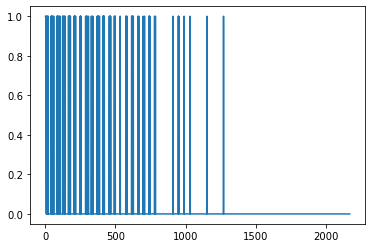

In [16]:
plt.plot(indices_vec)

In [17]:
DCT_img_trun005 = DCT_img*indices_vec # element wise multiplication 

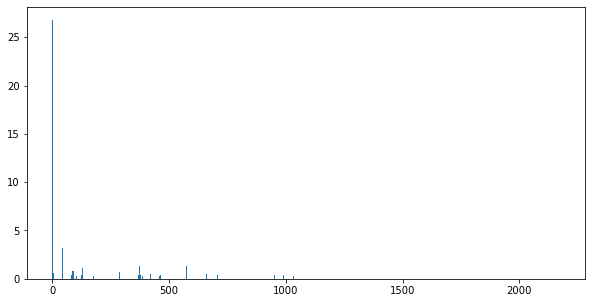

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.bar(np.arange(len(DCT_img)),np.abs(DCT_img_trun005))
plt.show()

In [19]:
DCT_mat_inv = construct_iDCT_Mat( column, row )

In [20]:
img_trun005_vec = np.matmul(DCT_mat_inv, DCT_img_trun005)

In [21]:
img_trun005 = np.reshape(img_trun005_vec, (53,41))

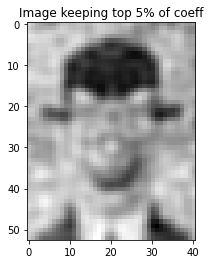

In [22]:
plt.imshow(img_trun005, cmap='gray')
plt.title("Image keeping top 5% of coeff")
plt.show()

Function for keeping top n% coeff of DCT 

In [23]:
def image_keep_n_coeff(n,img):
    
    # Frequency Domain
    img_vec = img.flatten()
    row = img.shape[0]
    column = img.shape[1]
    DCT_mat = construct_DCT_Mat(column ,row)
    DCT_img = np.matmul(DCT_mat, img_vec)
    
    DCT_img_sort = np.abs(np.sort(-np.abs(DCT_img))) # descending order 
    threshold_val = DCT_img_sort[int(np.floor((n)*len(DCT_img_sort)))] # n is the percentage of largest coef to keep
    indices_vec = np.abs(DCT_img)>threshold_val  
    DCT_img_trun = DCT_img*indices_vec
    DCT_mat_inv = construct_iDCT_Mat( column, row )
    
    # Pixel Domain
    img_trun_vec = np.matmul(DCT_mat_inv, DCT_img_trun)
    
    img_compressed = np.reshape(img_trun_vec, (row,column))
    return img_compressed

In [24]:
img_trun005 = image_keep_n_coeff(0.05,img)

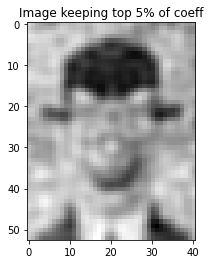

In [25]:
plt.imshow(img_trun005, cmap='gray')
plt.title("Image keeping top 5% of coeff")
plt.show()

In [26]:
img_trun01 = image_keep_n_coeff(0.1,img)

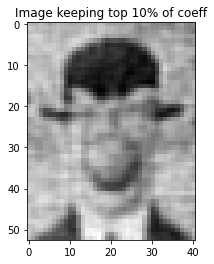

In [27]:
plt.imshow(img_trun01, cmap='gray')
plt.title("Image keeping top 10% of coeff")
plt.show()

In [28]:
img_trun02 = image_keep_n_coeff(0.2,img)

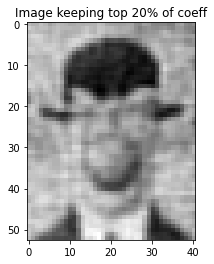

In [29]:
plt.imshow(img_trun01, cmap='gray')
plt.title("Image keeping top 20% of coeff")
plt.show()

In [30]:
img_trun04 = image_keep_n_coeff(0.4,img)

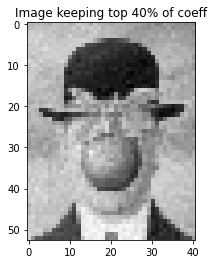

In [31]:
plt.imshow(img_trun04, cmap='gray')
plt.title("Image keeping top 40% of coeff")
plt.show()

Text(0.5, 1.0, 'Original Image')

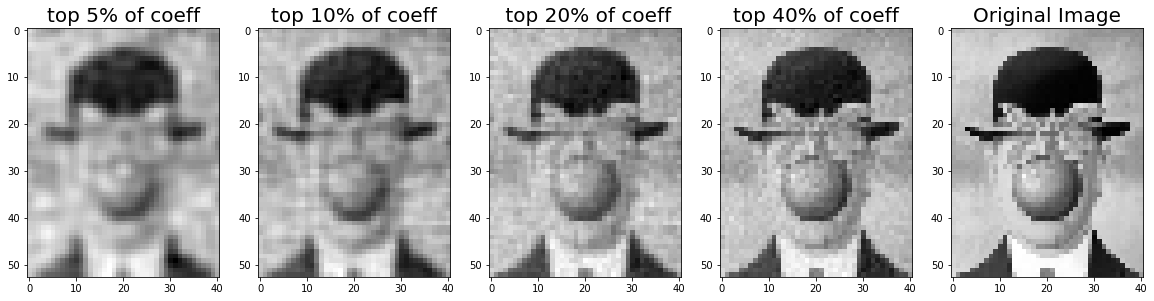

In [32]:
fig, ax = plt.subplots(1,5, figsize=(20,10))

ax[0].imshow(img_trun005, cmap='gray')
ax[0].set_title("top 5% of coeff",fontsize=20)

ax[1].imshow(img_trun01, cmap='gray')
ax[1].set_title("top 10% of coeff",fontsize=20)

ax[2].imshow(img_trun02, cmap='gray')
ax[2].set_title(" top 20% of coeff",fontsize=20)

ax[3].imshow(img_trun04, cmap='gray')
ax[3].set_title("top 40% of coeff",fontsize=20)

ax[4].imshow(img, cmap='gray')
ax[4].set_title("Original Image",fontsize=20)

Compressed Image Recovery 

Decided to use smaller size image first for efficiency in solving CVX

Rescaled size:  (29, 23)
[0.80040224 0.79398914 0.77289816 0.76001784 0.73274511 0.7734229
 0.774637   0.72804853 0.75405023 0.75915648 0.73903768 0.68573749
 0.65577571 0.6292246  0.60381008 0.58109202 0.59737952 0.61804407
 0.63554943 0.61461414 0.63756455 0.56628107 0.58472583]


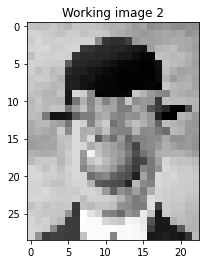

In [33]:
img2 = ski.transform.rescale( img_og, 0.1, anti_aliasing=False)

print("Rescaled size: ", img2.shape)
print(img2[1,:])
plt.imshow(img2, cmap='gray')
plt.title("Working image 2")
plt.show()

In [34]:
row2 = img2.shape[0]
column2 = img2.shape[1]
flatten_size2 = row2*column2

In [35]:
M2 = int(0.8*row2*column2)
print(M2)

533


In [36]:
I = np.eye(flatten_size2)

In [37]:
row_shuffle_I = np.random.permutation(flatten_size2)

In [38]:
print(row_shuffle_I.shape)

(667,)


In [39]:
B = I[row_shuffle_I[:M2],:]
print(B.shape)

(533, 667)


In [40]:
y_measured = np.matmul(B,img2.flatten())

In [41]:
Dinv = construct_iDCT_Mat( column2, row2 )

In [42]:
A = np.matmul(B,Dinv)

In [43]:
# CHeck (should be okay now)
#print(np.linalg.norm(y_measured - np.dot(A,DCT_img)))

In [44]:
 # solve l1 regularized problem using cvx
vb = cvx.Variable(flatten_size2) # vector beta
objective_dct = cvx.Minimize(cvx.norm(vb,1)) 
constraint_dct = [A@vb==y_measured]

In [45]:
problem_dct = cvx.Problem(objective_dct,constraint_dct)

In [46]:
result = problem_dct.solve(verbose=True, solver = 'CVXOPT',max_iter =1000,reltol = 1e-2,featol=1e-2)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 04:55:32 PM: Your problem has 667 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 04:55:32 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 04:55:32 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 04:55:32 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 04:55:32 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 04:55:32 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing

In [47]:
img2_recons = np.reshape(np.matmul(Dinv,vb.value),(row2,column2))

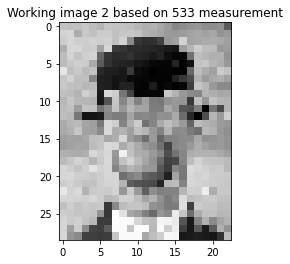

In [48]:
plt.imshow(img2_recons, cmap='gray')
plt.title("Working image 2 based on "+ str(M2) + " measurement")
plt.show()

Analyzing the compressed image recovery using the 53-by-41 pixel image 

In [49]:
def create_y_B(img,M):
    row = img.shape[0]
    column = img.shape[1]
    flatten_size = row*column
    
    I = np.eye(flatten_size)
    row_shuffle_I = np.random.permutation(flatten_size)
    #rng = np.random.default_rng()
    #row_shuffle_I = rng.permutation(M)
    
    B = I[row_shuffle_I[:M],:]
    #B = np.random.permutation(np.eye(flatten_size))[:M,:]
    
    y_measured = np.matmul(B,img.flatten())
    return y_measured,B

In [50]:
def convex_optim_image(y,B,row,column):
    flatten_size = row*column
    Dinv = construct_iDCT_Mat( column, row )
    A = np.matmul(B,Dinv)
    
     # solve l1 regularized problem using cvx
    vb = cvx.Variable(flatten_size) # vector beta
    objective_dct = cvx.Minimize(cvx.norm(vb,1)) 
    constraint_dct = [A@vb==y]
    
    problem_dct = cvx.Problem(objective_dct,constraint_dct)
    
    result = problem_dct.solve(verbose=True, solver = 'CVXOPT',max_iter =1000,reltol = 1e-2,featol=1e-2)
    
    #result = problem_dct.solve(verbose=True, solver = 'ECOS')
    
    image_recons = np.reshape(np.matmul(Dinv,vb.value),(row,column))
    
    return image_recons

In [51]:
r = np.array([0.2, 0.4, 0.6])
row = img.shape[0]
column = img.shape[1]
flatten_size = row*column

M = lambda r: int(r*row*column)

In [52]:
print(M(r[0]))

434


In [53]:
[y_r02_trial1,B_r02_trial1] = create_y_B(img,M(r[0]))

img_recons_r02_trial1 = convex_optim_image(y_r02_trial1,B_r02_trial1,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 04:55:38 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 04:55:38 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 04:55:38 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 04:55:38 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 04:55:38 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 04:55:38 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

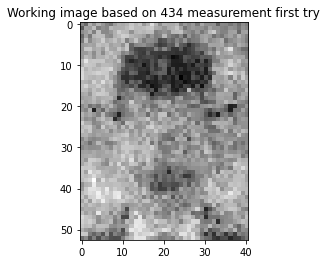

In [54]:
plt.imshow(img_recons_r02_trial1, cmap='gray')
plt.title("Working image based on "+ str(M(r[0])) + " measurement first try")
plt.show()

In [55]:
[y_r02_trial2,B_r02_trial2] = create_y_B(img,M(r[0]))

In [56]:
img_recons_r02_trial2 = convex_optim_image(y_r02_trial2,B_r02_trial2,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 04:57:02 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 04:57:02 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 04:57:02 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 04:57:02 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 04:57:02 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 04:57:02 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

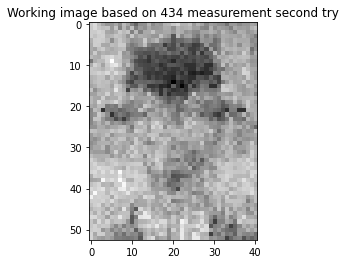

In [57]:
plt.imshow(img_recons_r02_trial2, cmap='gray')
plt.title("Working image based on "+ str(M(r[0])) + " measurement second try")
plt.show()

In [58]:
[y_r02_trial3,B_r02_trial3] = create_y_B(img,M(r[0]))

img_recons_r02_trial3 = convex_optim_image(y_r02_trial3,B_r02_trial3,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 04:58:38 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 04:58:38 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 04:58:38 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 04:58:38 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 04:58:38 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 04:58:38 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

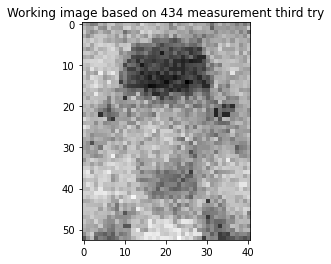

In [59]:
plt.imshow(img_recons_r02_trial3, cmap='gray')
plt.title("Working image based on "+ str(M(r[0])) + " measurement third try")
plt.show()

In [60]:
[y_r04_trial1,B_r04_trial1] = create_y_B(img,M(r[1]))

img_recons_r04_trial1 = convex_optim_image(y_r04_trial1,B_r04_trial1,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 05:00:16 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 05:00:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 05:00:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 05:00:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 05:00:16 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 05:00:16 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

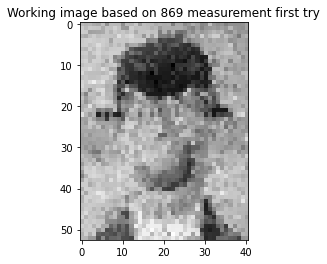

In [61]:
plt.imshow(img_recons_r04_trial1, cmap='gray')
plt.title("Working image based on "+ str(M(r[1])) + " measurement first try")
plt.show()

In [62]:
[y_r04_trial2,B_r04_trial2] = create_y_B(img,M(r[1]))

In [63]:
img_recons_r04_trial2 = convex_optim_image(y_r04_trial2,B_r04_trial2,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 05:02:13 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 05:02:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 05:02:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 05:02:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 05:02:13 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 05:02:13 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

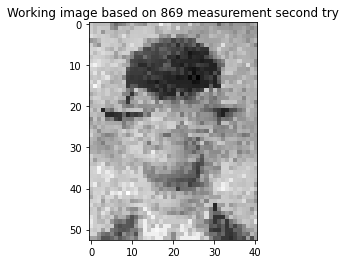

In [64]:
plt.imshow(img_recons_r04_trial2, cmap='gray')
plt.title("Working image based on "+ str(M(r[1])) + " measurement second try")
plt.show()

In [65]:
[y_r04_trial3,B_r04_trial3] = create_y_B(img,M(r[1]))


In [66]:
img_recons_r04_trial3 = convex_optim_image(y_r04_trial3,B_r04_trial3,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 05:03:57 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 05:03:57 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 05:03:57 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 05:03:57 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 05:03:57 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 05:03:57 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

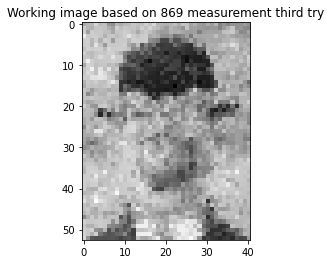

In [67]:
plt.imshow(img_recons_r04_trial3, cmap='gray')
plt.title("Working image based on "+ str(M(r[1])) + " measurement third try")
plt.show()

In [68]:
[y_r06_trial1,B_r06_trial1] = create_y_B(img,M(r[2]))

In [69]:
img_recons_r06_trial1 = convex_optim_image(y_r06_trial1,B_r06_trial1,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 05:05:54 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 05:05:54 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 05:05:54 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 05:05:54 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 05:05:54 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 05:05:54 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

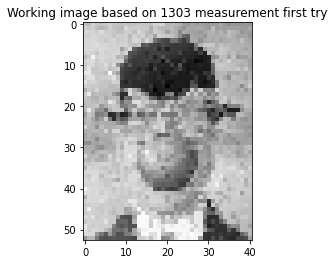

In [70]:
plt.imshow(img_recons_r06_trial1, cmap='gray')
plt.title("Working image based on "+ str(M(r[2])) + " measurement first try")
plt.show()

In [71]:
[y_r06_trial2,B_r06_trial2] = create_y_B(img,M(r[2]))

In [72]:
img_recons_r06_trial2 = convex_optim_image(y_r06_trial2,B_r06_trial2,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 05:08:00 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 05:08:00 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 05:08:00 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 05:08:00 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 05:08:00 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 05:08:00 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

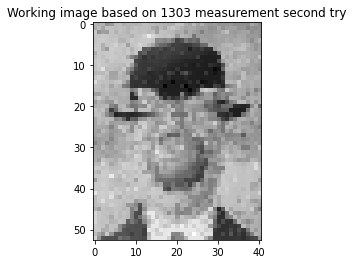

In [73]:
plt.imshow(img_recons_r06_trial2, cmap='gray')
plt.title("Working image based on "+ str(M(r[2])) + " measurement second try")
plt.show()

In [74]:
[y_r06_trial3,B_r06_trial3] = create_y_B(img,M(r[2]))

In [75]:
img_recons_r06_trial3 = convex_optim_image(y_r06_trial3,B_r06_trial3,row,column)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 05:10:18 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 05:10:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 05:10:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 05:10:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 05:10:18 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 05:10:18 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

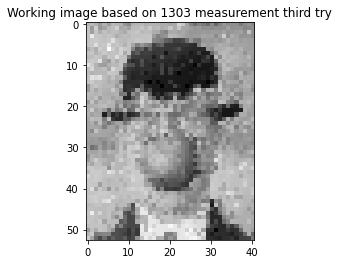

In [76]:
plt.imshow(img_recons_r06_trial3, cmap='gray')
plt.title("Working image based on "+ str(M(r[2])) + " measurement third try")
plt.show()

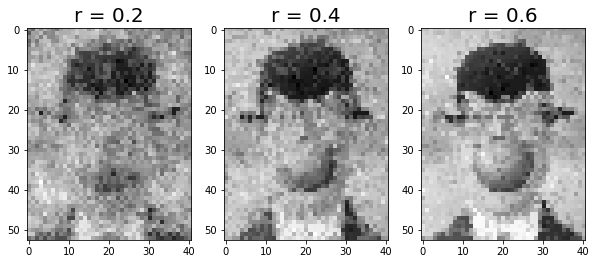

In [77]:
fig, ax = plt.subplots(1,3, figsize=(10,8))

ax[0].imshow(img_recons_r02_trial1, cmap='gray')
ax[0].set_title("r = 0.2",fontsize=20)

ax[1].imshow(img_recons_r04_trial1, cmap='gray')
ax[1].set_title("r = 0.4",fontsize=20)

ax[2].imshow(img_recons_r06_trial1, cmap='gray')
ax[2].set_title("r = 0.6",fontsize=20)

plt.show()

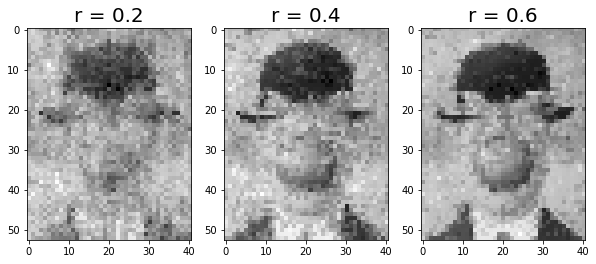

In [78]:
fig, ax = plt.subplots(1,3, figsize=(10,8))

ax[0].imshow(img_recons_r02_trial2, cmap='gray')
ax[0].set_title("r = 0.2",fontsize=20)

ax[1].imshow(img_recons_r04_trial2, cmap='gray')
ax[1].set_title("r = 0.4",fontsize=20)

ax[2].imshow(img_recons_r06_trial2, cmap='gray')
ax[2].set_title("r = 0.6",fontsize=20)

plt.show()

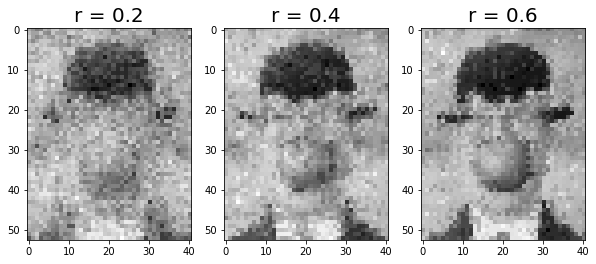

In [79]:
fig, ax = plt.subplots(1,3, figsize=(10,8))

ax[0].imshow(img_recons_r02_trial3, cmap='gray')
ax[0].set_title("r = 0.2",fontsize=20)

ax[1].imshow(img_recons_r04_trial3, cmap='gray')
ax[1].set_title("r = 0.4",fontsize=20)

ax[2].imshow(img_recons_r06_trial3, cmap='gray')
ax[2].set_title("r = 0.6",fontsize=20)

plt.show()

Analyzing the Unknown data 

In [80]:
with np.load('UnknownImage.npz') as data:
    y_unknown = data['y']
    B_unknown = data['B']

In [81]:
print(y_unknown.shape)

(2000,)


In [82]:
print(B_unknown.shape)

(2000, 2500)


In [83]:
row_column_unknown = int(np.sqrt(B_unknown.shape[1]))

In [84]:
print(row_column_unknown)

50


In [85]:
Dinv_unknown = construct_iDCT_Mat( row_column_unknown, row_column_unknown)

In [86]:
A_unknown = np.matmul(B_unknown,Dinv_unknown)

In [87]:
vb_unknown = cvx.Variable(B_unknown.shape[1]) # vector beta
objective_dct_unknown = cvx.Minimize(cvx.norm(vb_unknown,1)) 
constraint_dct_unknown = [A_unknown@vb_unknown==y_unknown]

In [88]:
problem_dct_unknown = cvx.Problem(objective_dct_unknown,constraint_dct_unknown)

In [89]:
result_unknown = problem_dct_unknown.solve(verbose=True, solver = 'CVXOPT',max_iter =1000,reltol = 1e-2,featol=1e-2);

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Mar 17 05:12:56 PM: Your problem has 2500 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 05:12:56 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 05:12:56 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 05:12:56 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 05:12:56 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 05:12:56 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

In [90]:
img_unknown_recons = np.reshape(np.matmul(Dinv_unknown,vb_unknown.value),(row_column_unknown,row_column_unknown))

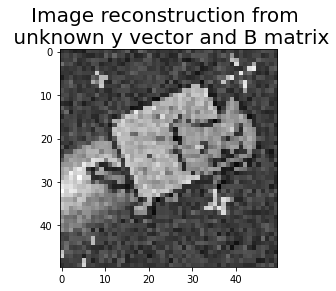

In [91]:
plt.imshow(img_unknown_recons, cmap='gray')
plt.title("Image reconstruction from \n unknown y vector and B matrix",fontsize=20)
#plt.savefig('unknownimage.png',bbox_inches='tight')
plt.show()

Nyancat picture 

Reference and Help:
- Steve Brunton Image compressing example with Python youtube video
- Bambad Helper code and demo code of the lectures